In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [57]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites']

In [58]:
df = pd.read_table("/Users/oisinbrannock/Downloads/beer_ratings.txt")

In [59]:
df.columns = cols

In [60]:
df = df[['alcohol_by_weight', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']]

In [61]:
df

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
0,4.523810,10.3,0.530,1.6268,15.12,67.252,26,0.9676,3.73,13.760,36.2500,61
1,4.714286,11.5,0.740,0.7968,17.64,82.110,32,0.9698,3.74,14.405,16.5625,61
2,5.238095,8.4,0.465,1.6268,15.75,68.816,42,0.9666,3.86,16.770,33.1250,60
3,4.476190,11.0,0.730,0.7968,15.12,60.214,9,0.9674,3.59,12.255,10.3125,60
4,4.904762,13.0,0.480,1.6268,17.01,76.636,15,0.9704,3.66,13.115,13.1250,59
...,...,...,...,...,...,...,...,...,...,...,...,...
930,4.285714,9.8,0.800,0.7968,15.75,176.732,8,0.9691,3.82,12.900,4.6875,72
931,4.285714,9.8,0.800,0.7968,15.75,176.732,8,0.9691,3.82,12.900,4.6875,74
932,5.095238,10.9,0.600,1.6268,16.38,195.500,8,0.9690,3.81,16.985,6.2500,71
933,5.571429,7.3,0.460,0.7968,13.86,74.290,22,0.9646,4.07,12.255,13.1250,73


Now I need to split the data up into independent and dependent variables

In [62]:
X = df.iloc[:, :-1] # Independent Variables

In [63]:
y = df.iloc[:, -1] # Dependent Variables

In [64]:
y

0      61
1      61
2      60
3      60
4      59
       ..
930    72
931    74
932    71
933    73
934    71
Name: rating, Length: 935, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

When running the model on every variable we have, it doesn't produce a good result so I need to limit them based on how good they correlate with rating scores

Text(0.5, 1.0, 'Correlation Matrix')

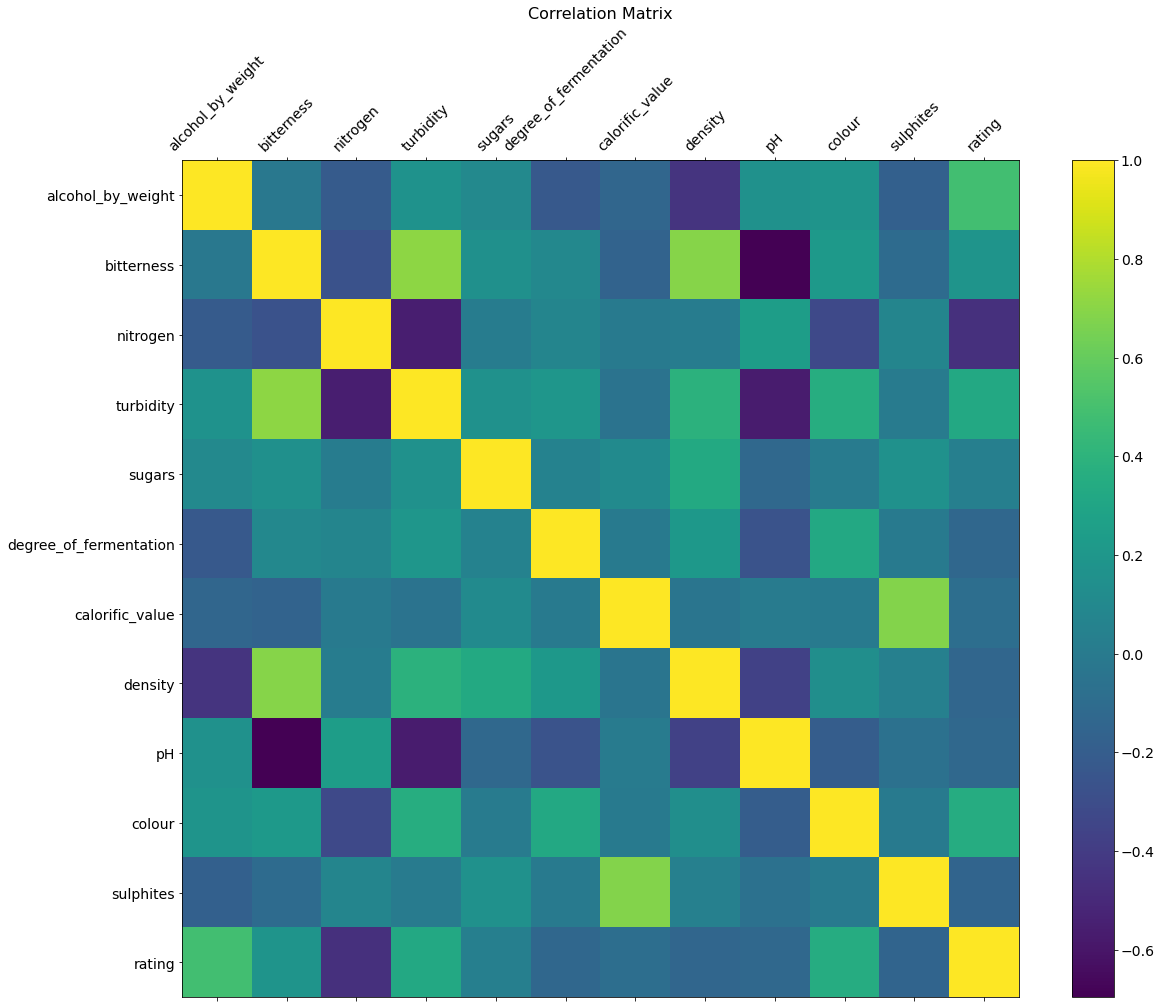

In [66]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16)

I'm going to test it manually first by taking each variable and removing them one by one see which is doing the most damage, then I can remove again and again etc.

So which attributes have a strong correlation with rating?:

    - alcohol_by_weight (+)
    - turbidity (+)
    - colour (+)
    - sugars (+)
    - nitrogen (-)

So what if we made a model with just these?

In [91]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              5620.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:53:31   Log-Likelihood:                         -2557.9
No. Observations:                 748   AIC:                                      5138.
Df Residuals:                     737   BIC:                                      5189.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [92]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  alcohol_by_weight          7.822186
bitterness                -0.110279
nitrogen                 -13.554148
turbidity                  0.267131
sugars                     0.011779
degree_of_fermentation    -0.042635
calorific_value            0.020872
density                   68.394124
pH                        -8.602666
colour                     0.568787
sulphites                 -0.081950
dtype: float64
R2:  0.9882192612456948


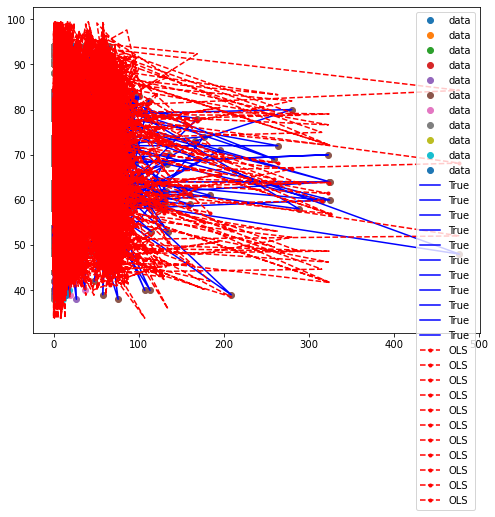

In [93]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_train, y_train, 'o', label="data")
ax.plot(X_train, y_train, 'b-', label="True")
ax.plot(X_train, results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_train, iv_u, 'r--')
ax.plot(X_train, iv_l, 'r--')
ax.legend(loc='best');

In [132]:
predictions = results.predict(X_test)

In [133]:
prediction_error = y_test - predictions

In [134]:
np.mean(prediction_error)

-0.5770270417000642

In [222]:
rt = DecisionTreeRegressor()
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test) 

In [223]:
diff = y_test - y_pred

In [224]:
np.mean(diff)

-0.5900178253119429

In [225]:
rt.score(X_train, y_train)

0.9943189919621385

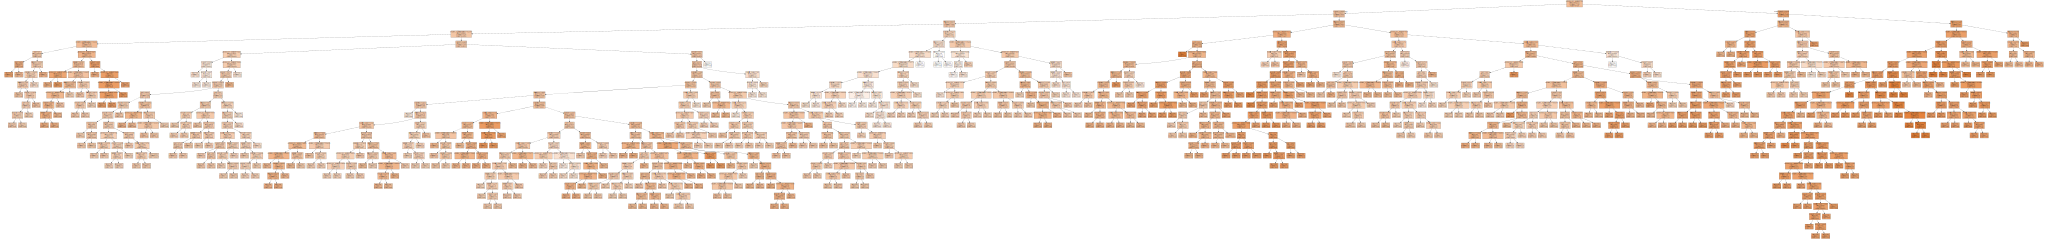

In [226]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(rt, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

In [227]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.0855614973262036


In [228]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 99.34254307783719


In [229]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 9.967072944342144


In [230]:
print('R Squared Score is:', rt.score(X_train, y_train))

R Squared Score is: 0.9943189919621385


In [231]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse = True):
    print (name, importance)

alcohol_by_weight 0.3114647374958682
colour 0.1789364838673212
nitrogen 0.12207890433770284
sulphites 0.0742728182504368
degree_of_fermentation 0.05963699800141129
bitterness 0.055438491202797764
calorific_value 0.050325611034388394
pH 0.04791697089813842
turbidity 0.04008589776471142
density 0.03337189992772663
sugars 0.026471187219497004
